In [1]:
import numpy as np
import matplotlib.pyplot as plt

from keras.layers import Input, Flatten, Dense, Conv2D
from keras.models import Model
from keras.optimizers import Adam
from keras.utils import to_categorical

from keras.datasets import cifar10

Using TensorFlow backend.


In [2]:
NUM_CLASSES = 10

In [7]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print(x_train, y_train)
print(type(x_train), x_train.shape)

[[[[ 59  62  63]
   [ 43  46  45]
   [ 50  48  43]
   ...
   [158 132 108]
   [152 125 102]
   [148 124 103]]

  [[ 16  20  20]
   [  0   0   0]
   [ 18   8   0]
   ...
   [123  88  55]
   [119  83  50]
   [122  87  57]]

  [[ 25  24  21]
   [ 16   7   0]
   [ 49  27   8]
   ...
   [118  84  50]
   [120  84  50]
   [109  73  42]]

  ...

  [[208 170  96]
   [201 153  34]
   [198 161  26]
   ...
   [160 133  70]
   [ 56  31   7]
   [ 53  34  20]]

  [[180 139  96]
   [173 123  42]
   [186 144  30]
   ...
   [184 148  94]
   [ 97  62  34]
   [ 83  53  34]]

  [[177 144 116]
   [168 129  94]
   [179 142  87]
   ...
   [216 184 140]
   [151 118  84]
   [123  92  72]]]


 [[[154 177 187]
   [126 137 136]
   [105 104  95]
   ...
   [ 91  95  71]
   [ 87  90  71]
   [ 79  81  70]]

  [[140 160 169]
   [145 153 154]
   [125 125 118]
   ...
   [ 96  99  78]
   [ 77  80  62]
   [ 71  73  61]]

  [[140 155 164]
   [139 146 149]
   [115 115 112]
   ...
   [ 79  82  64]
   [ 68  70  55]
   [ 67  69

In [8]:
x_train = x_train.astype('float32') / 255.0 # pandas.DataFrame.astype
x_test = x_test.astype('float32') / 255.0
print(x_train, x_test)

[[[[0.23137255 0.24313726 0.24705882]
   [0.16862746 0.18039216 0.1764706 ]
   [0.19607843 0.1882353  0.16862746]
   ...
   [0.61960787 0.5176471  0.42352942]
   [0.59607846 0.49019608 0.4       ]
   [0.5803922  0.4862745  0.40392157]]

  [[0.0627451  0.07843138 0.07843138]
   [0.         0.         0.        ]
   [0.07058824 0.03137255 0.        ]
   ...
   [0.48235294 0.34509805 0.21568628]
   [0.46666667 0.3254902  0.19607843]
   [0.47843137 0.34117648 0.22352941]]

  [[0.09803922 0.09411765 0.08235294]
   [0.0627451  0.02745098 0.        ]
   [0.19215687 0.10588235 0.03137255]
   ...
   [0.4627451  0.32941177 0.19607843]
   [0.47058824 0.32941177 0.19607843]
   [0.42745098 0.28627452 0.16470589]]

  ...

  [[0.8156863  0.6666667  0.3764706 ]
   [0.7882353  0.6        0.13333334]
   [0.7764706  0.6313726  0.10196079]
   ...
   [0.627451   0.52156866 0.27450982]
   [0.21960784 0.12156863 0.02745098]
   [0.20784314 0.13333334 0.07843138]]

  [[0.7058824  0.54509807 0.3764706 ]
   [0.6

In [9]:
y_train = to_categorical(y_train, NUM_CLASSES)
y_test = to_categorical(y_test, NUM_CLASSES)

In [15]:
print(y_train[0])
print(x_train[54, 12, 13, 2], x_train.shape)

[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
0.16470589 (50000, 32, 32, 3)


In [16]:
input_layer = Input((32,32,3)) # 3072

x = Flatten()(input_layer)
x = Dense(200, activation = 'relu')(x)
x = Dense(150, activation = 'relu')(x)

output_layer = Dense(NUM_CLASSES, activation = 'softmax')(x)

model = Model(input_layer, output_layer)

Instructions for updating:
Colocations handled automatically by placer.


In [17]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 200)               614600    
_________________________________________________________________
dense_2 (Dense)              (None, 150)               30150     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1510      
Total params: 646,260
Trainable params: 646,260
Non-trainable params: 0
_________________________________________________________________


In [18]:
opt = Adam(lr=0.0005)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [19]:
model.fit(x_train, y_train, batch_size=32, epochs=10, shuffle=True)

Instructions for updating:
Use tf.cast instead.
Epoch 1/10
50000/50000 [==============================] - 12s 246us/step - loss: 1.8416 - acc: 0.3344
Epoch 2/10
50000/50000 [==============================] - 17s 349us/step - loss: 1.6653 - acc: 0.4057
Epoch 3/10
50000/50000 [==============================] - 21s 410us/step - loss: 1.5840 - acc: 0.4341
Epoch 4/10
50000/50000 [==============================] - 21s 415us/step - loss: 1.5338 - acc: 0.4516
Epoch 5/10
50000/50000 [==============================] - 22s 442us/step - loss: 1.4980 - acc: 0.4669
Epoch 6/10
50000/50000 [==============================] - 21s 427us/step - loss: 1.4633 - acc: 0.4763
Epoch 7/10
50000/50000 [==============================] - 22s 431us/step - loss: 1.4395 - acc: 0.4860
Epoch 8/10
50000/50000 [==============================] - 22s 443us/step - loss: 1.4172 - acc: 0.4957
Epoch 9/10
50000/50000 [==============================] - 22s 435us/step - loss: 1.3953 - acc: 0.5042
Epoch 10/10
50000/50000 [=========

In [20]:
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 0s 33us/step


[1.465140626144409, 0.479]

In [21]:
CLASSES = np.array(['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'])

preds = model.predict(x_test)
# 마지막 차원을 1로 만들도록 argamx
preds_single = CLASSES[np.argmax(preds, axis = -1)]
actual_single = CLASSES[np.argmax(y_test, axis = -1)]

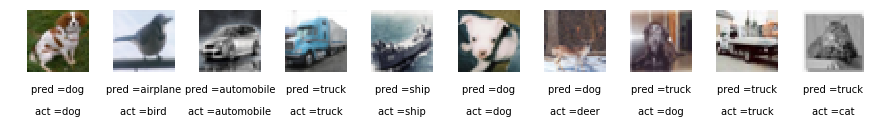

In [26]:
import matplotlib.pyplot as plt

n_to_show = 10
indices = np.random.choice(range(len(x_test)), n_to_show)

fig = plt.figure(figsize=(15, 3)) # 전체 plot 크기
fig.subplots_adjust(hspace=0.4, wspace=0.4) # 한 칸 크기

for i, idx in enumerate(indices):
    img = x_test[idx]
    ax = fig.add_subplot(1, n_to_show, i+1)
    ax.axis('off')
    ax.text(
        0.5, -0.35, 'pred =' + str(preds_single[idx]), fontsize=10,
        ha='center', transform=ax.transAxes
    )
    ax.text(
        0.5, -0.7, 'act =' + str(actual_single[idx]), fontsize=10,
        ha='center', transform=ax.transAxes
    )
    ax.imshow(img)